In [76]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('CBD poi.csv', usecols=[1], engine='python')
dataframe.head()

,poi-1
0,35
1,40
2,21
3,23
4,39


In [77]:
dataframe = dataframe.sort_values(by=['poi-1'])
dataframe.head()

,poi-1
62,18
20,18
18,18
70,20
72,20


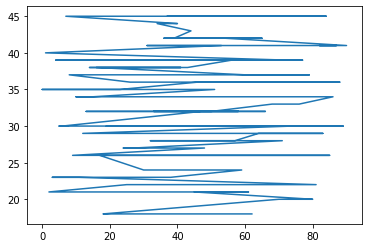

In [78]:
plt.plot(dataframe)
plt.show()

In [79]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [80]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [81]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [82]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [83]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

63 28


In [84]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [85]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testX)
print(testY)

[[0.7407407 ]
 [0.7407407 ]
 [0.7407407 ]
 [0.77777773]
 [0.77777773]
 [0.77777773]
 [0.77777773]
 [0.77777773]
 [0.77777773]
 [0.77777773]
 [0.81481487]
 [0.8518519 ]
 [0.8518519 ]
 [0.8518519 ]
 [0.8518519 ]
 [0.8518519 ]
 [0.8888889 ]
 [0.8888889 ]
 [0.8888889 ]
 [0.8888889 ]
 [0.9259259 ]
 [0.9629629 ]
 [0.9629629 ]
 [0.99999994]
 [0.99999994]
 [0.99999994]]
[0.7407407  0.7407407  0.77777773 0.77777773 0.77777773 0.77777773
 0.77777773 0.77777773 0.77777773 0.81481487 0.8518519  0.8518519
 0.8518519  0.8518519  0.8518519  0.8888889  0.8888889  0.8888889
 0.8888889  0.9259259  0.9629629  0.9629629  0.99999994 0.99999994
 0.99999994 0.99999994]


In [86]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [87]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
61/61 - 2s - loss: 0.2779 - 2s/epoch - 40ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1918 - 138ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1345 - 141ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0964 - 147ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0726 - 174ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0581 - 146ms/epoch - 2ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0495 - 148ms/epoch - 2ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0447 - 150ms/epoch - 2ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0418 - 147ms/epoch - 2ms/step
Epoch 10/100
61/61 - 0s - loss: 0.0396 - 152ms/epoch - 2ms/step
Epoch 11/100
61/61 - 0s - loss: 0.0379 - 138ms/epoch - 2ms/step
Epoch 12/100
61/61 - 0s - loss: 0.0364 - 137ms/epoch - 2ms/step
Epoch 13/100
61/61 - 0s - loss: 0.0348 - 139ms/epoch - 2ms/step
Epoch 14/100
61/61 - 0s - loss: 0.0332 - 144ms/epoch - 2ms/step
Epoch 15/100
61/61 - 0s - loss: 0.0317 - 142ms/epoch - 2ms/step
Epoch 16/100
61/61 - 0s - loss: 0.0302 - 142ms/epoc

In [88]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.59 RMSE
Test Score: 2.04 RMSE


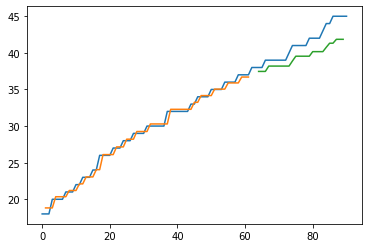

In [89]:
# rmse = root mean square error
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('CBD poi.csv', usecols=[2], engine='python')
dataframe = dataframe.sort_values(by=['poi-2'])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


Epoch 1/100
56/56 - 2s - loss: 0.1974 - 2s/epoch - 42ms/step
Epoch 2/100
56/56 - 0s - loss: 0.1269 - 136ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 0.0840 - 149ms/epoch - 3ms/step
Epoch 4/100
56/56 - 0s - loss: 0.0567 - 153ms/epoch - 3ms/step
Epoch 5/100
56/56 - 0s - loss: 0.0412 - 124ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 0.0318 - 131ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 0.0267 - 125ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 0.0230 - 130ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 0.0201 - 132ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 0.0174 - 128ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 0.0149 - 127ms/epoch - 2ms/step
Epoch 12/100
56/56 - 0s - loss: 0.0125 - 134ms/epoch - 2ms/step
Epoch 13/100
56/56 - 0s - loss: 0.0105 - 131ms/epoch - 2ms/step
Epoch 14/100
56/56 - 0s - loss: 0.0085 - 130ms/epoch - 2ms/step
Epoch 15/100
56/56 - 0s - loss: 0.0070 - 132ms/epoch - 2ms/step
Epoch 16/100
56/56 - 0s - loss: 0.0055 - 133ms/epoc

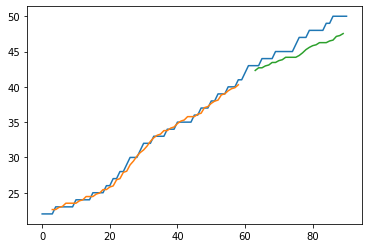

In [93]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()